### In this notebook, I'm going to try some witchery in order to generate a prediction of temperature from carbon and some other biogeochemical parameters.
#### First, we need to load in the .mat file of interest.
This has been handled by the script `JuliaReadMat.ipynb`, which read the `.mat` file into a Julia dataframe and then wrote it to a CSV, called `24_north.csv` (saved in this folder). We can therefore just read it into python with pandas

In [93]:
import pandas as pd
import numpy as np

alldata_24N_csv_filename = "/Users/ct6g18/Python/keras/ML_Carbon/24_north.csv"
data_24N = pd.read_csv(alldata_24N_csv_filename)

data_24N["DATE"] = data_24N["DATE"] // 10000 # No idea why this is off by ten thousand but whatever.

theta = data_24N["theta"].loc[data_24N['DATE'] < 1993]
dic   = data_24N["dic"].loc[data_24N['DATE'] < 1993]
prs   = data_24N["pressure"].loc[data_24N['DATE'] < 1993]
lon   = data_24N["longitude"].loc[data_24N['DATE'] < 1993]
toxy  = data_24N["toxy"].loc[data_24N['DATE'] < 1993]
NO    = data_24N["NO"].loc[data_24N['DATE'] < 1993]
PO    = data_24N["PO"].loc[data_24N['DATE'] < 1993]
date  = data_24N["DATE"].loc[data_24N['DATE'] < 1993] 


In [87]:
theta = np.asarray(theta)
dic   = np.asarray(dic)
prs   = np.asarray(prs)
lon   = np.asarray(lon)
NO    = np.asarray(NO)
PO    = np.asarray(PO)

theta

array([21.3287, 21.286 , 20.0529, ..., 27.5822, 19.4022, 14.6789])

In [94]:
idx_arr = np.random.permutation(len(theta))

theta = theta[idx_arr]
dic = dic[idx_arr]
prs = prs[idx_arr]
lon = lon[idx_arr]
NO = NO[idx_arr]
PO = PO[idx_arr]

data = np.asarray([theta,dic,prs,lon,NO,PO]).transpose(1,0)
data = np.nan_to_num(data)

Now we're going to want to split this up into training, validation and test data.
It's a fairly small dataset so we can probably reserve 20% for testing.

In [95]:
int(np.floor(len(theta) * 0.8)) # 1812

train_targets = theta[:1812]
test_targets = theta[1812:]

train_data = data[:1812,:]
test_data = data[1812:,:]

mean_values = train_data.mean(axis=0)
std_values = train_data.std(axis=0)

train_data -= mean_values
train_data /= std_values

test_data -= mean_values
test_data /= std_values

Check this has done what we expect

In [96]:
train_data.mean(axis=0)
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

Okay sweet. Now lets get on with training our model

- First lets split the training data into training and validation data

In [97]:
train_data = train_data[:1400,:]
val_data = train_data[1400:,:]

train_targets = train_targets[:1400]
val_targets = train_targets[1400:]

val_data

array([], shape=(0, 7), dtype=float64)

In [99]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu'
                      ,input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

model.fit(train_data,train_targets,epochs=15,batch_size=16)
val_mse,val_mae = model.evaluate(test_data,test_targets)
print(f"So the mean error is approximately {val_mae:.2f} degrees")

Epoch 1/15
 8/88 [=>............................] - ETA: 0s - loss: 189.2913 - mae: 11.0309 

2022-09-30 15:39:30.062905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 1s 8ms/step - loss: 132.8429 - mae: 8.7553
Epoch 2/15
88/88 [==============================] - 1s 7ms/step - loss: 5.5795 - mae: 1.7035
Epoch 3/15
88/88 [==============================] - 1s 7ms/step - loss: 0.9481 - mae: 0.7400
Epoch 4/15
88/88 [==============================] - 1s 8ms/step - loss: 0.3196 - mae: 0.3945
Epoch 5/15
88/88 [==============================] - 1s 8ms/step - loss: 0.2413 - mae: 0.3351
Epoch 6/15
88/88 [==============================] - 1s 7ms/step - loss: 0.2291 - mae: 0.3242
Epoch 7/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1353 - mae: 0.2558
Epoch 8/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1240 - mae: 0.2402
Epoch 9/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1390 - mae: 0.2574
Epoch 10/15
88/88 [==============================] - 1s 7ms/step - loss: 0.1207 - mae: 0.2423
Epoch 11/15
88/88 [==============================] - 1s 7ms/step - loss: 0.116

2022-09-30 15:39:39.804015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [105]:
pred_theta = model.predict(test_data)
actual_theta = test_targets

array([[18.210272 ],
       [ 2.0705066],
       [14.811796 ],
       [22.694407 ],
       [ 2.6357872],
       [23.109499 ],
       [24.065157 ],
       [ 5.3948617],
       [10.027769 ],
       [ 3.7937157],
       [22.427168 ],
       [ 9.066979 ],
       [20.122385 ],
       [ 6.4542727],
       [12.377205 ],
       [ 2.372467 ],
       [21.972391 ],
       [ 1.8447593],
       [ 4.5303264],
       [17.61073  ],
       [ 1.4913543],
       [ 1.5333768],
       [ 4.705443 ],
       [22.92687  ],
       [ 1.7339958],
       [16.766916 ],
       [24.171095 ],
       [ 1.8525375],
       [13.60025  ],
       [ 1.8456506],
       [22.955715 ],
       [14.207469 ],
       [ 1.5777969],
       [22.773592 ],
       [20.880672 ],
       [ 2.924246 ],
       [21.235758 ],
       [22.95389  ],
       [20.614553 ],
       [ 7.0885673],
       [ 4.111938 ],
       [25.54093  ],
       [ 8.458186 ],
       [ 3.9595404],
       [ 2.5108173],
       [25.530987 ],
       [24.701164 ],
       [18.51

Text(0.5, 1.0, 'Predicted Temperature from DIC, NO, PO, Pressure & Longitude')

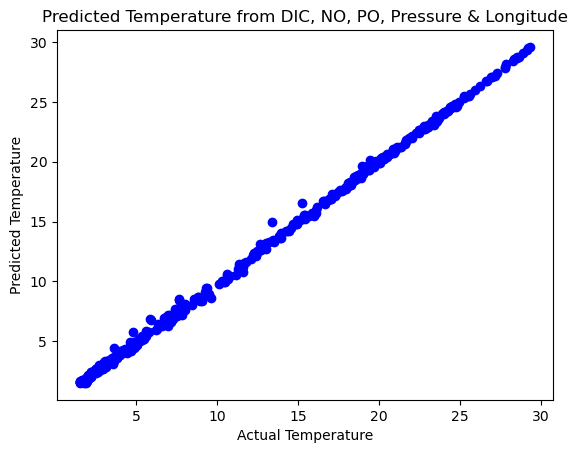

In [113]:
import matplotlib.pyplot as plt
plt.plot(actual_theta,pred_theta,'bo')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predicted Temperature from DIC, NO, PO, Pressure & Longitude')

In [121]:
from sklearn.metrics import r2_score
TestR2Value = r2_score(actual_theta,pred_theta)
print(f"R^2 value = {TestR2Value:.4f}, ie. {100*TestR2Value:.2f}% of variance captured")

R^2 value = 0.9992, ie. 99.92% of variance captured


#### The current implementation uses the full DIC field. 
This isn't what we actually want: we want to use DIC - Canth. This is going to 
give us a larger number of 'DIC' fields but probably a reduced accuracy.

Anyhow, the first thing to do at this point would be to have a look at whether 
we can now us this model to predict the section temperature distribution for the
next cruise.

If that works well, we can then look into predicting the temperature with the 
DIC - Canth change: ie., the redistributed temperature

Text(0.5, 1.0, 'Actual Temperature')

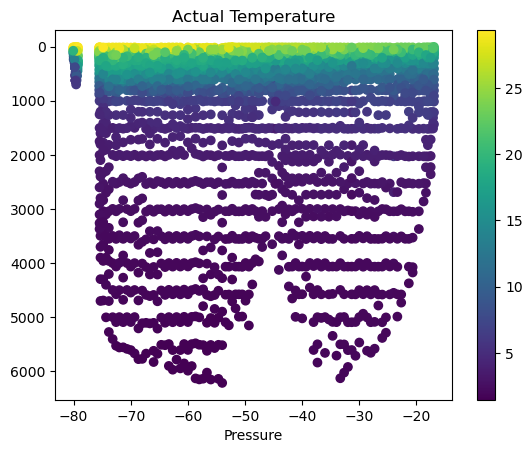

In [126]:
section = plt.scatter(lon, prs, c=theta)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Actual Temperature")

In [129]:
pred_theta_all = model.predict(data)
pred_theta_all

array([[ 4.6982856],
       [ 5.181795 ],
       [21.461025 ],
       ...,
       [ 8.550928 ],
       [17.815983 ],
       [ 5.2060075]], dtype=float32)

Text(0.5, 1.0, 'Predicted Temperature')

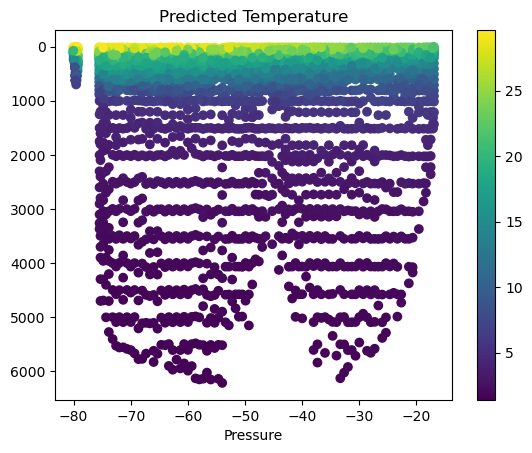

In [134]:
section = plt.scatter(lon, prs, c=pred_theta_all)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Predicted Temperature")

In [145]:
pred_theta_all = np.squeeze(np.asarray(pred_theta_all))
theta = np.asarray(theta)
print(f'Predicted temperature shape: {pred_theta_all.shape}')
print(f'Predicted temperature shape: {theta.shape}')


Predicted temperature shape: (2266,)
Predicted temperature shape: (2266,)


Text(0.5, 1.0, 'Predicted - Actual Temperature')

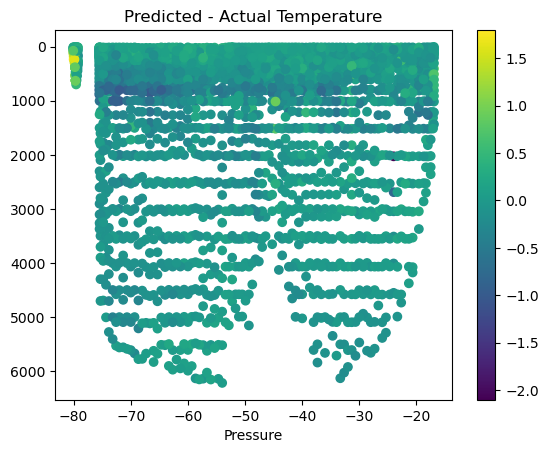

In [147]:
section = plt.scatter(lon, prs, c=pred_theta_all - theta)
# marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
ax = section.axes
plt.colorbar()
ax.invert_yaxis()
plt.xlabel("Longitude")
plt.xlabel("Pressure")
plt.title("Predicted - Actual Temperature")